# Income Prediction - Classification - if a client makes less or above 50k/year

- Used Models:
    - Logistic Regression
    - Naive Bayes
    - KNN
    - Decision Tree
    - Random Forest
    - Cross Validation for each Model

In [1]:
#Importing all the necessary libraries

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn import metrics
%matplotlib inline

## Exploratory Data Analysis

- Issues:
    - Column names have space
    - Some null values entered as ' ?'
    - There are duplicate values
    - A column has too many unique values which is problem for classification

In [2]:
data = pd.read_csv('income_evaluation.csv')
df = data.copy()

In [3]:
df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Data Cleaning

In [6]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [7]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']

<AxesSubplot:>

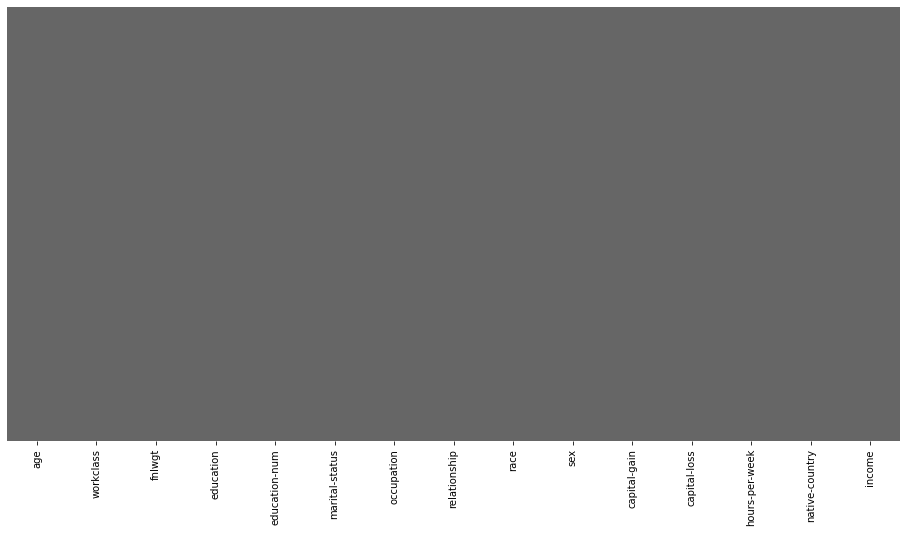

In [8]:
# Visualizing null values
plt.figure(figsize=(16, 8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Dark2_r')

In [9]:
df[df.duplicated()==True]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.isin([" ?"]).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64

In [12]:
df['workclass'].replace(' ?', df.workclass.mode()[0], inplace = True)

In [13]:
df['occupation'].replace(' ?', df.occupation.mode()[0], inplace = True)

In [14]:
df['native-country'].replace(' ?', df['native-country'].mode()[0], inplace = True)

In [15]:
for column in df.columns:
    print(column,'\t', df[column].nunique())

age 	 73
workclass 	 8
fnlwgt 	 21648
education 	 16
education-num 	 16
marital-status 	 7
occupation 	 14
relationship 	 6
race 	 5
sex 	 2
capital-gain 	 119
capital-loss 	 92
hours-per-week 	 94
native-country 	 41
income 	 2


In [16]:
df.drop('fnlwgt', axis = 1, inplace= True)

In [17]:
df_cat = [ 'workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for col in df_cat:
    df[col] = LabelEncoder().fit_transform(df[col])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32537 non-null  int64
 1   workclass       32537 non-null  int32
 2   education       32537 non-null  int32
 3   education-num   32537 non-null  int64
 4   marital-status  32537 non-null  int32
 5   occupation      32537 non-null  int32
 6   relationship    32537 non-null  int32
 7   race            32537 non-null  int32
 8   sex             32537 non-null  int32
 9   capital-gain    32537 non-null  int64
 10  capital-loss    32537 non-null  int64
 11  hours-per-week  32537 non-null  int64
 12  native-country  32537 non-null  int32
 13  income          32537 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 2.6 MB


In [19]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0


In [20]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [21]:
x = StandardScaler().fit_transform(x)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

## Modelling

### Logistic Regression

In [23]:
model = LogisticRegression(max_iter = 100000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Evaluation

In [24]:
print(confusion_matrix(y_test, y_pred))

[[7006  422]
 [1255 1079]]


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7428
           1       0.72      0.46      0.56      2334

    accuracy                           0.83      9762
   macro avg       0.78      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762



In [26]:
roc_auc_score(y_test, y_pred)

0.7027422121258685

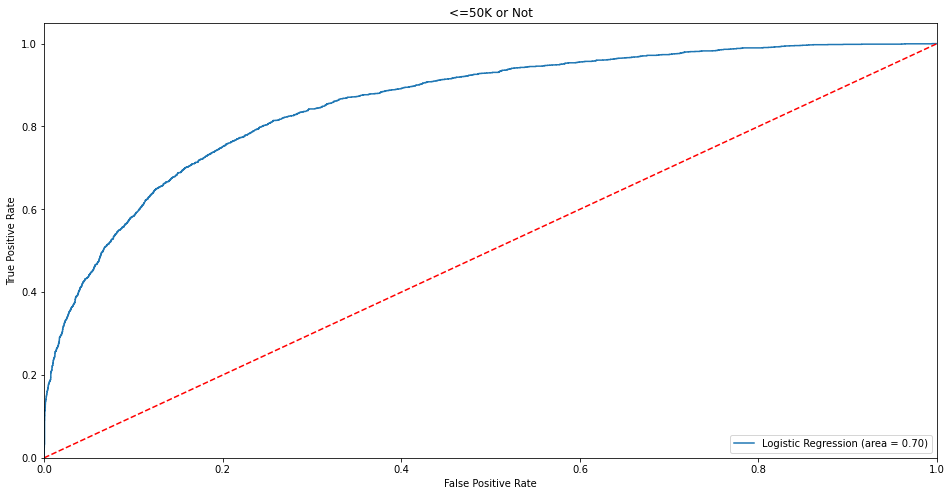

In [27]:
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('<=50K or Not')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Cross Validation for Logistic Regression

In [28]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.8215155332382496
Standard deviation of CV: 0.008928877848575099


### Naive Bayes

In [29]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

####  Evaluation

In [30]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Naive Bayes:''\n', cm)

Confusion Matrix for Naive Bayes:
 [[7040  388]
 [1536  798]]


In [31]:
cr = classification_report(y_test, y_pred)
print('Classification Report for Naive Bayes:''\n''\n', cr)

Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7428
           1       0.67      0.34      0.45      2334

    accuracy                           0.80      9762
   macro avg       0.75      0.64      0.67      9762
weighted avg       0.79      0.80      0.78      9762



In [32]:
auc = roc_auc_score(y_test, y_pred)
print('Auc Score for Naive Bayes:', auc)

Auc Score for Naive Bayes: 0.6448337631666742


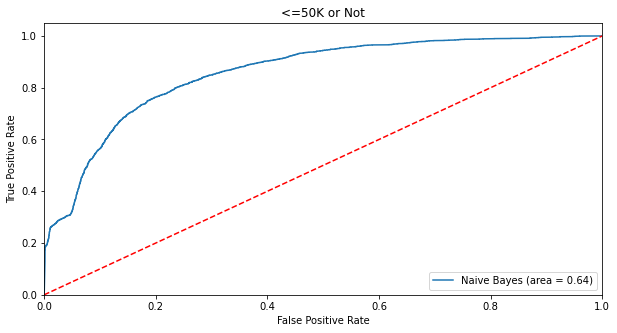

In [33]:
NB_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('<=50K or Not')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

#### Cross Validation for Naive Bayes

In [34]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.803996525163071
Standard deviation of CV: 0.006947722661662573


### Decision Trees

In [35]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Evaluation

In [36]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Decision Tree:''\n', cm)

Confusion Matrix for Decision Tree:
 [[6539  889]
 [ 929 1405]]


In [37]:
cr = classification_report(y_test, y_pred)
print("Classification Report for Decision Tree:""\n""\n", cr)

Classification Report for Decision Tree:

               precision    recall  f1-score   support

           0       0.88      0.88      0.88      7428
           1       0.61      0.60      0.61      2334

    accuracy                           0.81      9762
   macro avg       0.74      0.74      0.74      9762
weighted avg       0.81      0.81      0.81      9762



In [38]:
auc = roc_auc_score(y_test, y_pred)
print('Auc Score for Decision Tree:', auc)

Auc Score for Decision Tree: 0.7411442911072257


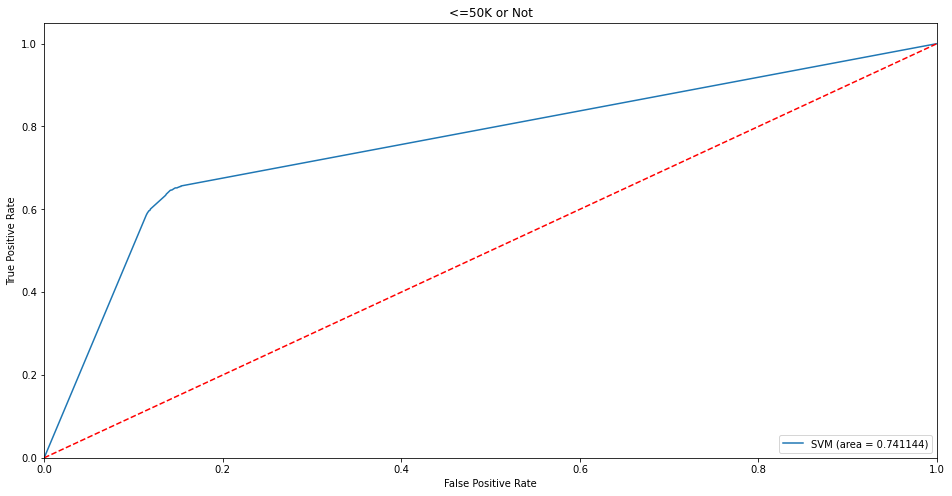

In [39]:
DT_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize = (16, 8))
plt.plot(fpr, tpr, label='SVM (area = %02f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('<=50K or Not')
plt.legend(loc="lower right")
plt.savefig('Decision_Tree_ROC')
plt.show()

#### Cross Validation for Decision Trees

In [40]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.8141385994155395
Standard deviation of CV: 0.009065655369510416


### Decision Trees with Entropy

In [41]:
model = DecisionTreeClassifier(criterion="entropy")
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Evaluation

In [42]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Decision Tree:''\n', cm)

Confusion Matrix for Decision Tree:
 [[6581  847]
 [ 925 1409]]


In [43]:
cr = classification_report(y_test, y_pred)
print("Classification Report for Decision Tree:""\n""\n", cr)

Classification Report for Decision Tree:

               precision    recall  f1-score   support

           0       0.88      0.89      0.88      7428
           1       0.62      0.60      0.61      2334

    accuracy                           0.82      9762
   macro avg       0.75      0.74      0.75      9762
weighted avg       0.82      0.82      0.82      9762



In [44]:
auc = roc_auc_score(y_test, y_pred)
print('Auc Score for Decision Tree:', auc)

Auc Score for Decision Tree: 0.7448283296856333


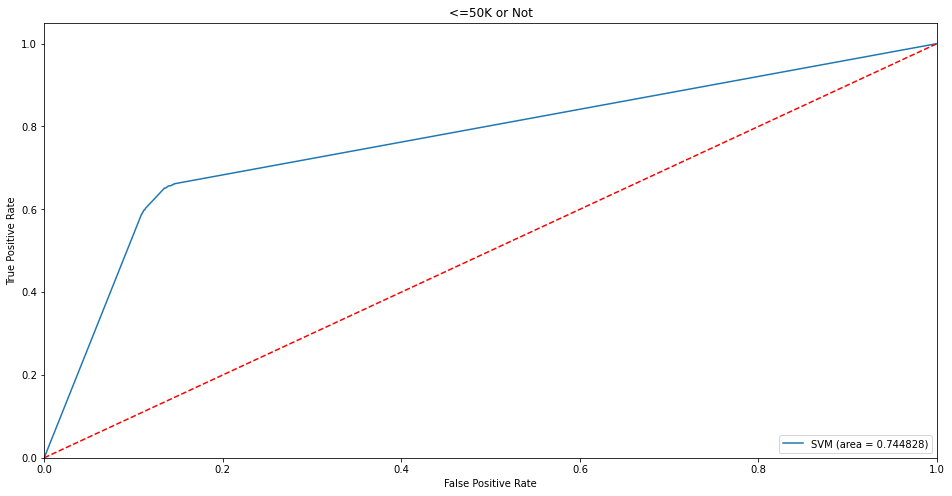

In [45]:
DT_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize = (16, 8))
plt.plot(fpr, tpr, label='SVM (area = %02f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('<=50K or Not')
plt.legend(loc="lower right")
plt.savefig('Decision_Tree_ROC')
plt.show()

#### Cross Validation for Decision Trees with Entropy

In [46]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.814577812325646
Standard deviation of CV: 0.009330779714838401


### Random Forest

In [47]:
model = RandomForestClassifier(n_estimators = 10, random_state = None)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Evaluation

In [48]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for SVM:''\n', cm)

Confusion Matrix for SVM:
 [[6858  570]
 [ 957 1377]]


In [49]:
cr = classification_report(y_test, y_pred)
print("Classification Report for SVM:""\n""\n", cr)

Classification Report for SVM:

               precision    recall  f1-score   support

           0       0.88      0.92      0.90      7428
           1       0.71      0.59      0.64      2334

    accuracy                           0.84      9762
   macro avg       0.79      0.76      0.77      9762
weighted avg       0.84      0.84      0.84      9762



In [50]:
auc = roc_auc_score(y_test, y_pred)
print('Auc Score for svm:', auc)

Auc Score for svm: 0.7566188105037148


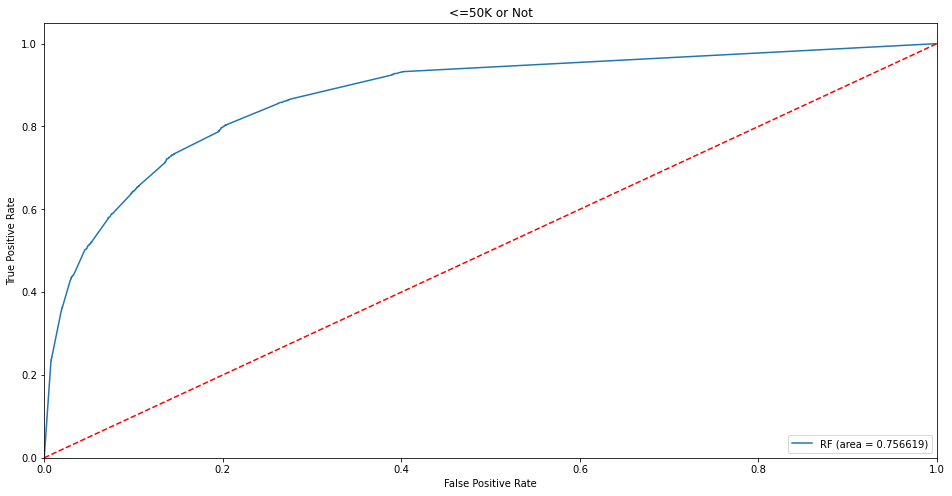

In [51]:
RF_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize = (16, 8))
plt.plot(fpr, tpr, label = 'RF (area = %02f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('<=50K or Not')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

#### Cross Validation for Random Forest

In [52]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.8424589830819551
Standard deviation of CV: 0.007002235389547601


### KNN

In [53]:
model = KNeighborsClassifier(n_neighbors=5)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Evaluation

In [54]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix ''\n', cm)

Confusion matrix 
 [[6770  658]
 [ 965 1369]]


In [55]:
cr = classification_report(y_test, y_pred)
print("Classification Report for KNN:""\n""\n", cr)

Classification Report for KNN:

               precision    recall  f1-score   support

           0       0.88      0.91      0.89      7428
           1       0.68      0.59      0.63      2334

    accuracy                           0.83      9762
   macro avg       0.78      0.75      0.76      9762
weighted avg       0.83      0.83      0.83      9762



In [56]:
auc = roc_auc_score(y_test, y_pred)
print('Auc Score for KNN:', auc)

Auc Score for KNN: 0.7489814818660165


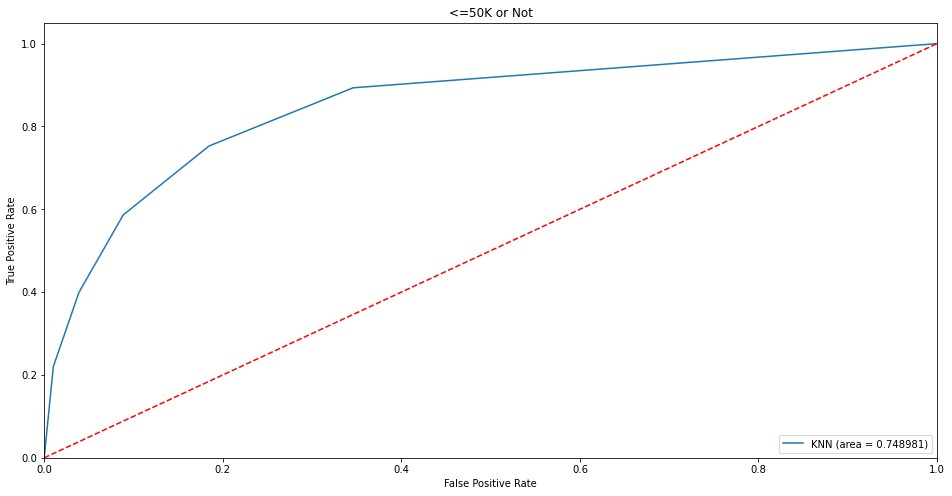

In [57]:
KNN_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize = (16, 8))
plt.plot(fpr, tpr, label = 'KNN (area = %02f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('<=50K or Not')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

#### Cross Validation for KNN

In [58]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.8279692562530293
Standard deviation of CV: 0.005242470253607525
